In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# raw_dataset = pd.read_csv("/data/fast0/datasets/glathida-3.1.0/data/T.csv")

print("importing data")
T_dataset = pd.read_csv("~/data/glac/T.csv")
TT_dataset = pd.read_csv("~/data/glac/TT.csv")
TTT_dataset = pd.read_csv("~/data/glac/TTT.csv")


# T_dataset = pd.read_csv("~/stuff/coding/glacier/data/T.csv")
# TT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TT.csv")
# TTT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TTT.csv")

print("sorting data")
T_dataset = T_dataset.drop("GLACIER_DB", axis=1)
T_dataset = T_dataset.drop("POLITICAL_UNIT", axis=1)
T_dataset = T_dataset.drop("GLACIER_ID", axis=1)
T_dataset = T_dataset.drop("GLACIER_NAME", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_POINTS", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("TOTAL_LENGTH_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("INTERPOLATION_METHOD", axis=1)
T_dataset = T_dataset.drop("INVESTIGATOR", axis=1)
T_dataset = T_dataset.drop("SPONSORING_AGENCY", axis=1)
T_dataset = T_dataset.drop("ELEVATION_DATE", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD_DETAILS", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD", axis=1)
T_dataset = T_dataset.drop("SURVEY_DATE", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS", axis=1)
T_dataset = T_dataset.drop("AREA", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("MAXIMUM_THICKNESS", axis=1)
T_dataset = T_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("DATA_FLAG", axis=1)
T_dataset = T_dataset.drop("REMARKS", axis=1)
T_dataset = T_dataset.drop("REFERENCES", axis=1)
T_dataset = T_dataset.drop("MEAN_SLOPE", axis=1)
T_dataset = T_dataset.dropna()

TT_dataset = TT_dataset.drop("POLITICAL_UNIT", axis=1)
TT_dataset = TT_dataset.drop("GLACIER_NAME", axis=1)
TT_dataset = TT_dataset.drop("SURVEY_DATE", axis=1)
TT_dataset = TT_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("MAXIMUM_THICKNESS", axis=1)
TT_dataset = TT_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("DATA_FLAG", axis=1)
TT_dataset = TT_dataset.drop("REMARKS", axis=1)
TT_dataset = TT_dataset.dropna()


TTT_dataset = TTT_dataset.drop("POLITICAL_UNIT", axis=1)
TTT_dataset = TTT_dataset.drop("GLACIER_NAME", axis=1)
TTT_dataset = TTT_dataset.drop("SURVEY_DATE", axis=1)
TTT_dataset = TTT_dataset.drop("PROFILE_ID", axis=1)
TTT_dataset = TTT_dataset.drop("THICKNESS_UNCERTAINTY", axis=1)
TTT_dataset = TTT_dataset.drop("DATA_FLAG", axis=1)
TTT_dataset = TTT_dataset.drop("REMARKS", axis=1)
TTT_dataset = TTT_dataset.drop("POINT_ID", axis=1)
TTT_dataset = TTT_dataset.dropna()


T = pd.DataFrame(T_dataset)
T.rename(columns = {"LAT":"LAT_CENT",
                    "LON":"LON_CENT"},
         inplace = True)

TT = pd.DataFrame(TT_dataset)
TT.rename(columns = {"LOWER_BOUND":"TT_LOWER_BOUND",
                     "UPPER_BOUND":"TT_UPPER_BOUND",
                     "AREA":"TT_AREA",
                     "MEAN_SLOPE":"TT_MEAN_SLOPE",
                     "MEAN_THICKNESS":"TT_MEAN_THICKNESS"},
          inplace = True)

TTT = pd.DataFrame(TTT_dataset)
TTT.rename(columns = {"ELEVATION":"POINT_ELEVATION",
                      "THICKNESS":"POINT_THICKNESS"},
           inplace = True)

TTT_plu = pd.merge(TTT, T, how="inner", on=["GlaThiDa_ID"])

TTT_plus = pd.merge(TT,TTT_plu, how="inner", on=["GlaThiDa_ID"])

TTT_plus

importing data


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


sorting data


,GlaThiDa_ID,TT_LOWER_BOUND,TT_UPPER_BOUND,TT_AREA,TT_MEAN_SLOPE,TT_MEAN_THICKNESS,POINT_LAT,POINT_LON,POINT_ELEVATION,POINT_THICKNESS,LAT_CENT,LON_CENT
0,362,2600,2650,0.01985,24.0,14,46.960842,9.390133,2624.0,15,46.9595,9.3891
1,362,2600,2650,0.01985,24.0,14,46.960844,9.390126,2625.0,15,46.9595,9.3891
2,362,2600,2650,0.01985,24.0,14,46.960847,9.390118,2625.0,15,46.9595,9.3891
3,362,2600,2650,0.01985,24.0,14,46.960849,9.390111,2625.0,14,46.9595,9.3891
4,362,2600,2650,0.01985,24.0,14,46.960851,9.390103,2624.0,14,46.9595,9.3891
...,...,...,...,...,...,...,...,...,...,...,...,...
166422,2100,5100,5200,0.01600,32.0,0,39.235309,97.762576,4780.0,90,39.2370,97.7550
166423,2100,5100,5200,0.01600,32.0,0,39.235217,97.762203,4780.0,101,39.2370,97.7550
166424,2100,5100,5200,0.01600,32.0,0,39.235171,97.761845,4780.0,106,39.2370,97.7550
166425,2100,5100,5200,0.01600,32.0,0,39.235114,97.761459,4782.0,112,39.2370,97.7550


In [2]:
# TTT_plus.dropna()
TTT_plus.isna().sum()
TTT_plus.dropna()
TTT_plus.isna().sum()

GlaThiDa_ID          0
TT_LOWER_BOUND       0
TT_UPPER_BOUND       0
TT_AREA              0
TT_MEAN_SLOPE        0
TT_MEAN_THICKNESS    0
POINT_LAT            0
POINT_LON            0
POINT_ELEVATION      0
POINT_THICKNESS      0
LAT_CENT             0
LON_CENT             0
dtype: int64

In [3]:
#split the dataset and reserve some to test what was trained.
train_dataset = TTT_plus.sample(frac=0.8, random_state=0)
test_dataset = TTT_plus.drop(train_dataset.index)

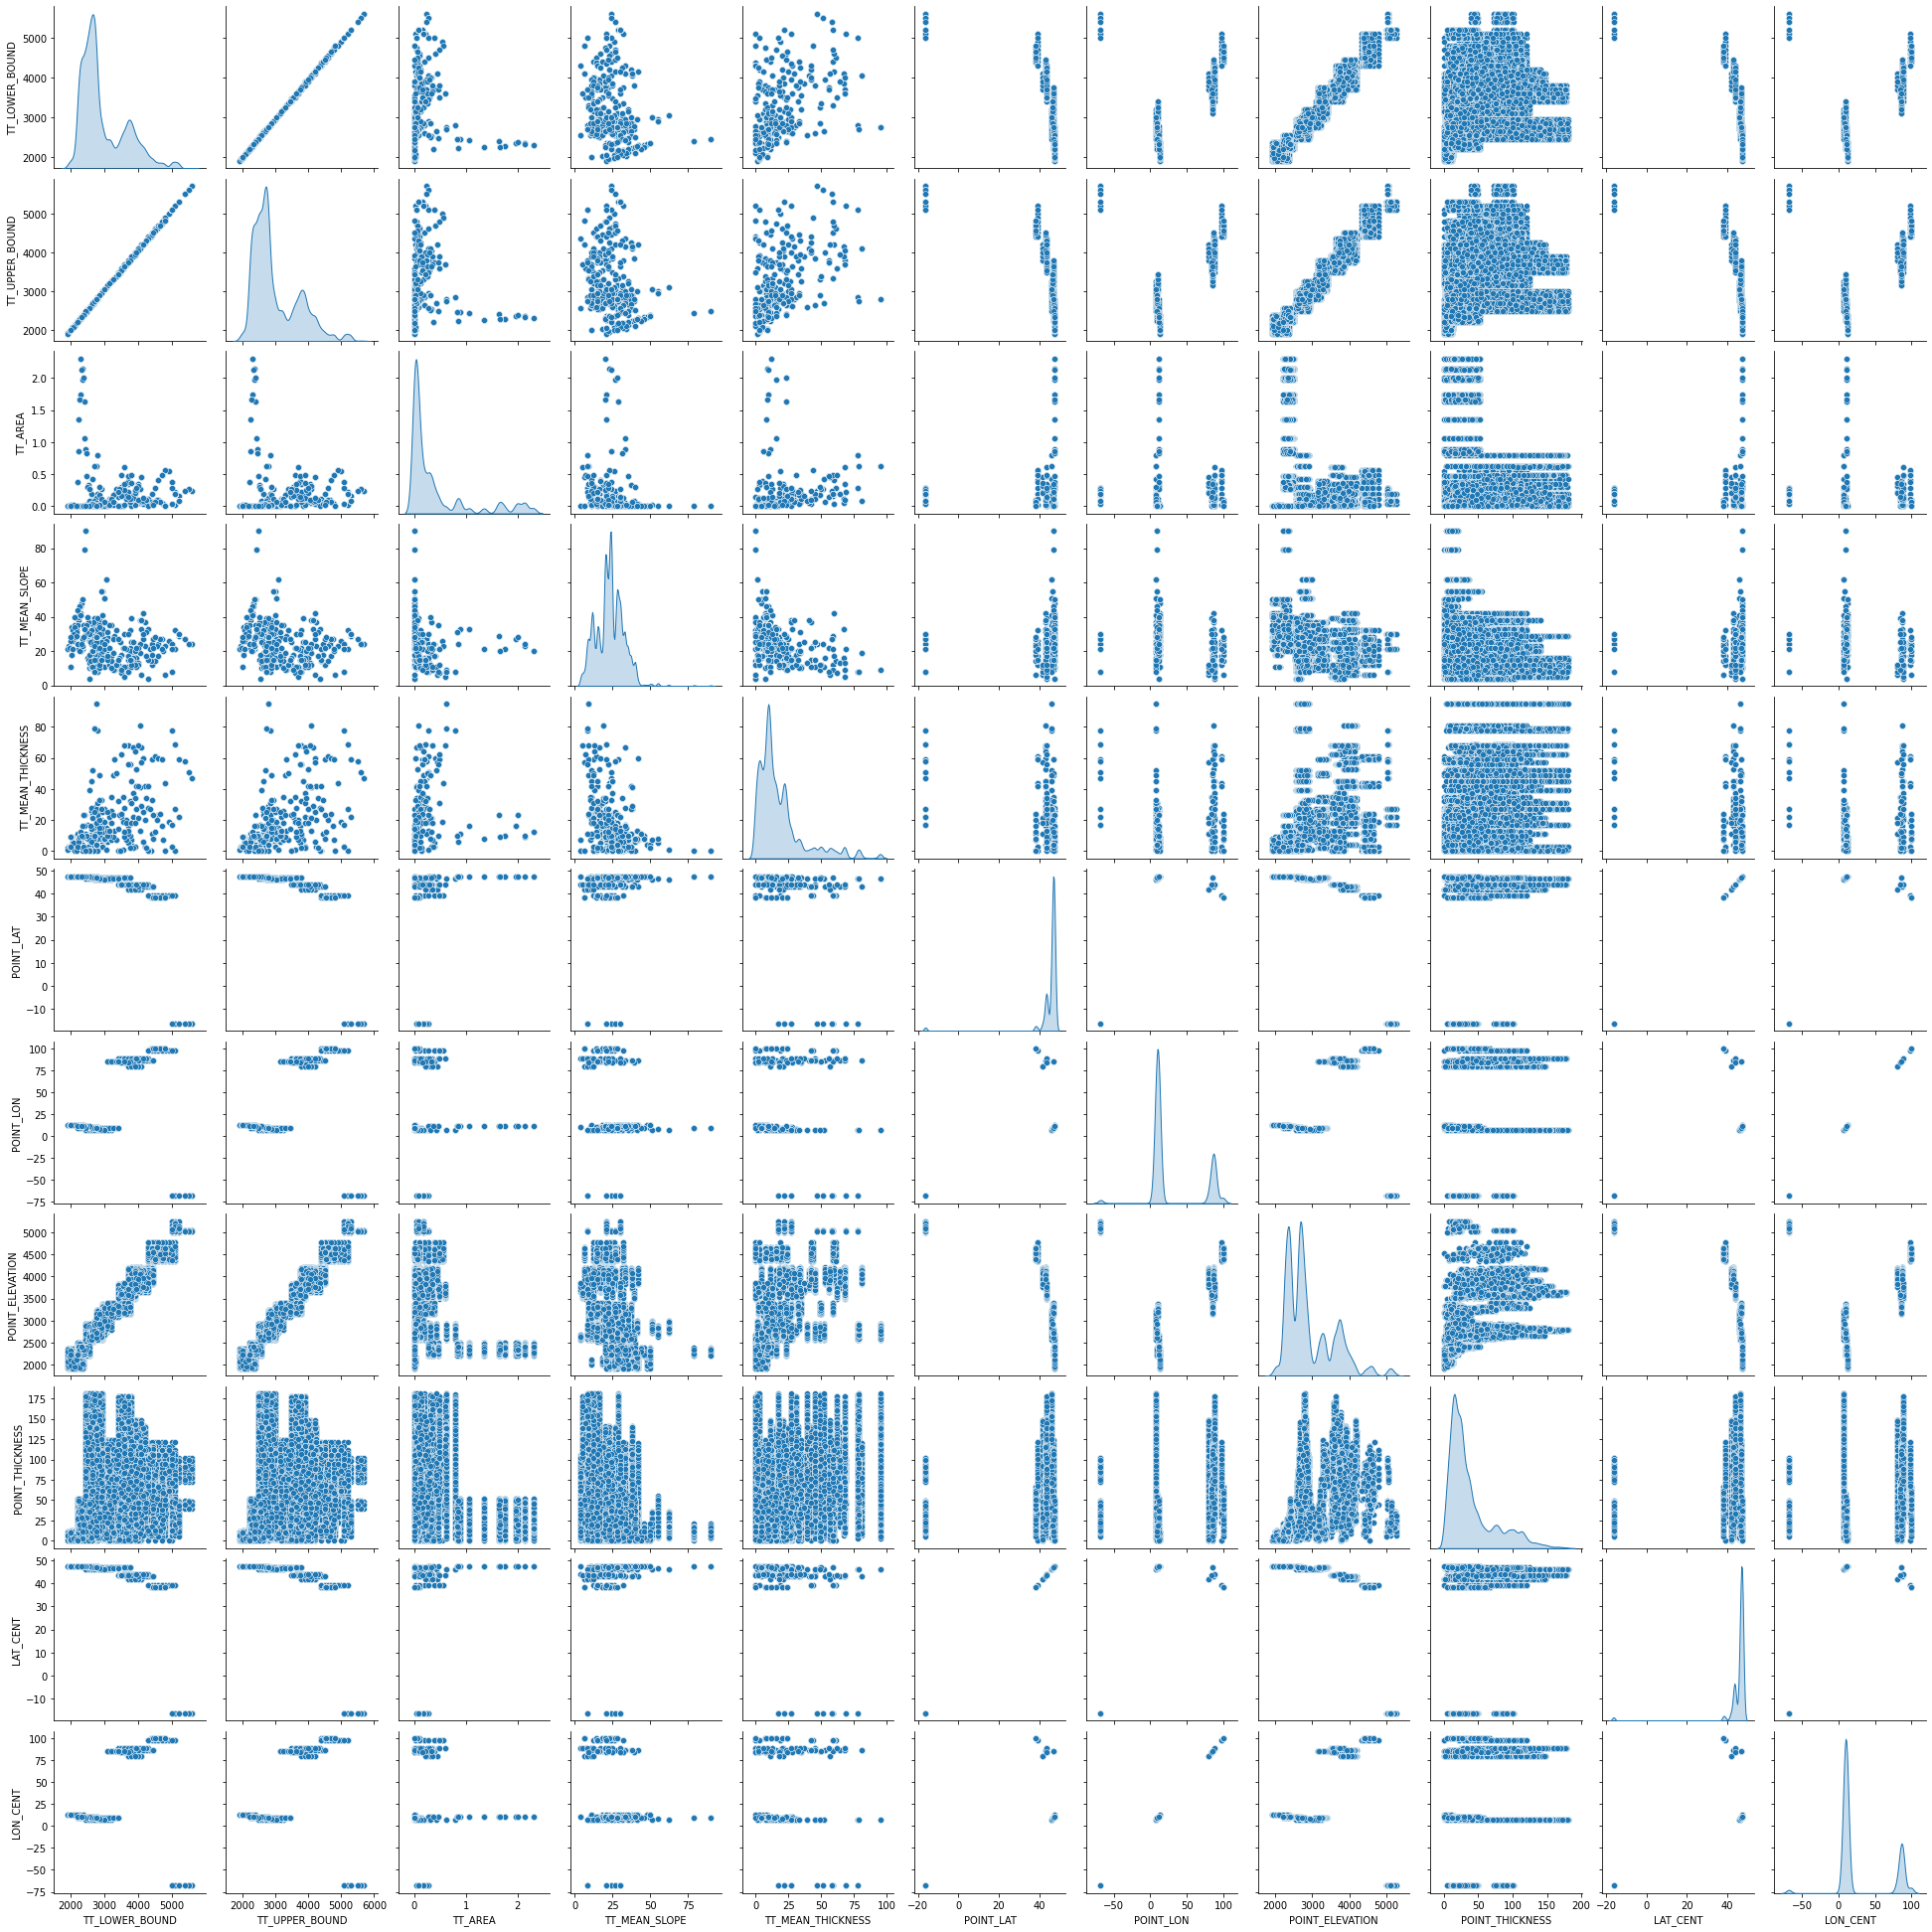

In [4]:
sns.pairplot(train_dataset[["TT_LOWER_BOUND",
                            "TT_UPPER_BOUND",
                            "TT_AREA",
                            "TT_MEAN_SLOPE",
                            "TT_MEAN_THICKNESS",
                            "POINT_LAT",
                            "POINT_LON",
                            "POINT_ELEVATION",
                            "POINT_THICKNESS",
                            "LAT_CENT",
                            "LON_CENT"]],
             diag_kind='kde')

In [5]:
#separate out features - what will be trained to predict desired attribute
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#define label - attribute training to be picked
train_labels = train_features.pop("POINT_THICKNESS")
test_labels = test_features.pop("POINT_THICKNESS")

train_features.describe().transpose()[['mean', 'std']]

,mean,std
GlaThiDa_ID,1246.065126,805.955247
TT_LOWER_BOUND,2956.907234,678.711591
TT_UPPER_BOUND,2999.129260,693.300833
TT_AREA,0.423253,0.636670
TT_MEAN_SLOPE,23.084023,9.011630
TT_MEAN_THICKNESS,18.169623,17.729830
POINT_LAT,45.248961,7.556599
POINT_LON,29.966949,36.369489
POINT_ELEVATION,2930.546484,649.182383
LAT_CENT,45.248784,7.555996


In [6]:
#establish normalization layers
normalizer = {}
variable_list = ("TT_LOWER_BOUND",
                 "TT_UPPER_BOUND",
                 "TT_AREA",
                 "TT_MEAN_THICKNESS",
                 "TT_MEAN_SLOPE",
                 "POINT_LAT",
                 "POINT_LON",
                 "POINT_ELEVATION",
                 "LAT_CENT",
                 "LON_CENT")
for variable_name in variable_list:

    normalizer[variable_name] = preprocessing.Normalization(input_shape=[1,], axis=None)
    normalizer[variable_name].adapt(np.array(train_features[variable_name]))
    
    
normalizer['ALL'] = preprocessing.Normalization(axis=-1)
normalizer['ALL'].adapt(np.array(train_features))

In [7]:
def build_linear_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        loss="mean_absolute_error")
    
    return model

def plot_single_model_variable(x, y,feature_name):
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel("Avg Thickness (m)")
#     plt.xlim((0,20))
    plt.legend()
      
def plot_loss(history):
#     plt.subplots(figsize=(10,5))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #   plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    

In [8]:
test_results = {}
linear_model = {}
linear_history = {}
linear_results = {}

In [9]:
%%time
variable_list = ("TT_LOWER_BOUND",
                 "TT_UPPER_BOUND",
                 "TT_AREA",
                 "TT_MEAN_THICKNESS",
                 "TT_MEAN_SLOPE",
                 "POINT_LAT",
                 "POINT_LON",
                 "POINT_ELEVATION",
                 "LAT_CENT",
                 "LON_CENT")
for variable_name in variable_list:

    linear_model[variable_name] = build_linear_model(normalizer[variable_name])
    linear_history[variable_name] = linear_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    linear_results[variable_name] = linear_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

linear_results

CPU times: user 24min 51s, sys: 2min 6s, total: 26min 57s
Wall time: 17min 38s


{'TT_LOWER_BOUND': 20.75031089782715,
 'TT_UPPER_BOUND': 20.7639102935791,
 'TT_AREA': 23.55410385131836,
 'TT_MEAN_THICKNESS': 20.538179397583008,
 'TT_MEAN_SLOPE': 22.344388961791992,
 'POINT_LAT': 23.548524856567383,
 'POINT_LON': 19.39995002746582,
 'POINT_ELEVATION': 20.345539093017578,
 'LAT_CENT': 23.548559188842773,
 'LON_CENT': 19.399581909179688}

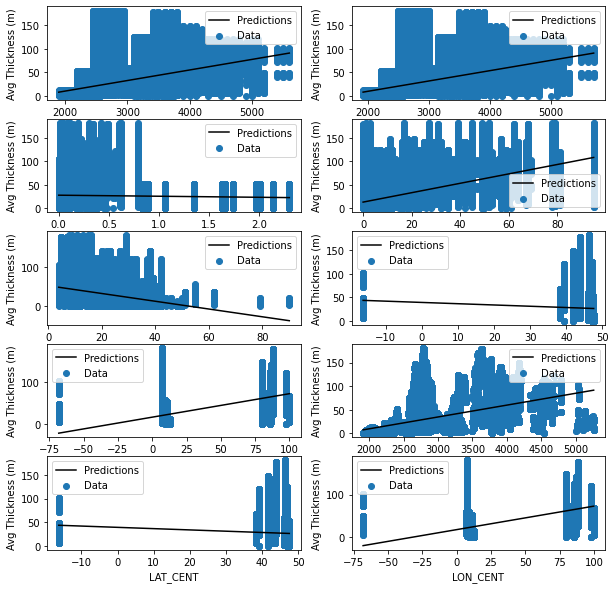

In [10]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = linear_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

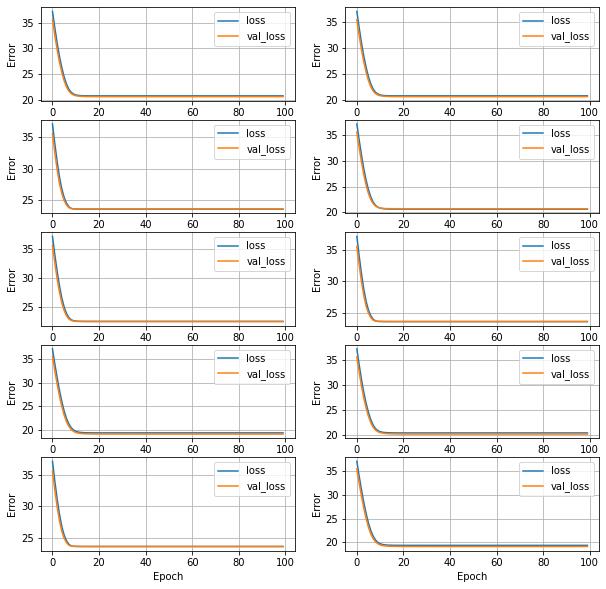

In [11]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    plot_loss(linear_history[variable_name])

In [12]:
%%time
linear_model = build_linear_model(normalizer['ALL'])

history = linear_model.fit(
train_features, train_labels,        
   epochs=100,
   verbose=0,
   validation_split = 0.2)

test_results["MULTI"] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

CPU times: user 3min 27s, sys: 18.1 s, total: 3min 45s
Wall time: 2min 28s


{'MULTI': 17.334165573120117}

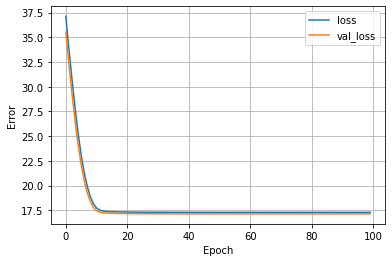

In [13]:
plot_loss(history)

In [14]:
def build_dnn_model(norm):
    model = keras.Sequential([
              norm,
              layers.Dense(64, activation='relu'),
              layers.Dense(64, activation='relu'),
              layers.Dense(1) ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

def dnn_test_results(feature_name):
    dnn_test_results[feature_name] = dnn_model.evaluate(
        test_features[feature_name],
        test_labels, verbose=0)

In [15]:
test_results = {}
dnn_model = {}
dnn_history = {}
dnn_results = {}

In [16]:
%%time
variable_list = ("TT_LOWER_BOUND",
                 "TT_UPPER_BOUND",
                 "TT_AREA",
                 "TT_MEAN_THICKNESS",
                 "TT_MEAN_SLOPE",
                 "POINT_LAT",
                 "POINT_LON",
                 "POINT_ELEVATION",
                 "LAT_CENT",
                 "LON_CENT")
for variable_name in variable_list:

    dnn_model[variable_name] = build_dnn_model(normalizer[variable_name])
    dnn_history[variable_name] = dnn_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    dnn_results[variable_name] = dnn_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

dnn_results

CPU times: user 7h 45min, sys: 1h 52min 48s, total: 9h 37min 48s
Wall time: 47min 8s


{'TT_LOWER_BOUND': 18.828777313232422,
 'TT_UPPER_BOUND': 19.112409591674805,
 'TT_AREA': 20.373865127563477,
 'TT_MEAN_THICKNESS': 19.29530906677246,
 'TT_MEAN_SLOPE': 20.25379753112793,
 'POINT_LAT': 19.291519165039062,
 'POINT_LON': 15.556842803955078,
 'POINT_ELEVATION': 16.294240951538086,
 'LAT_CENT': 19.356128692626953,
 'LON_CENT': 16.34360122680664}

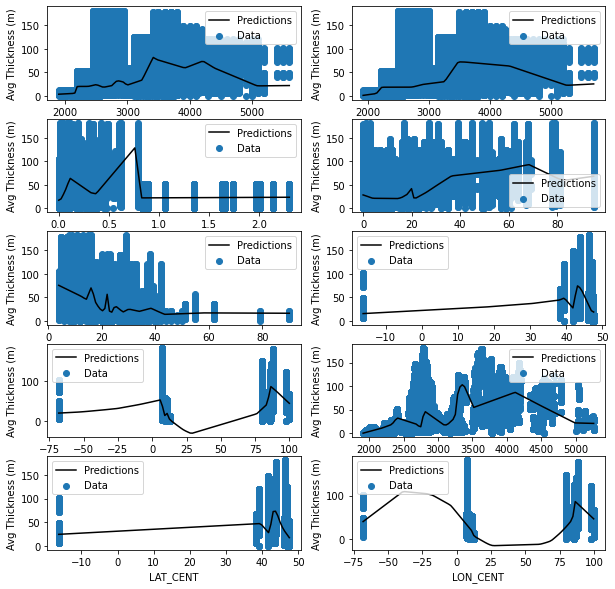

In [17]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = dnn_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

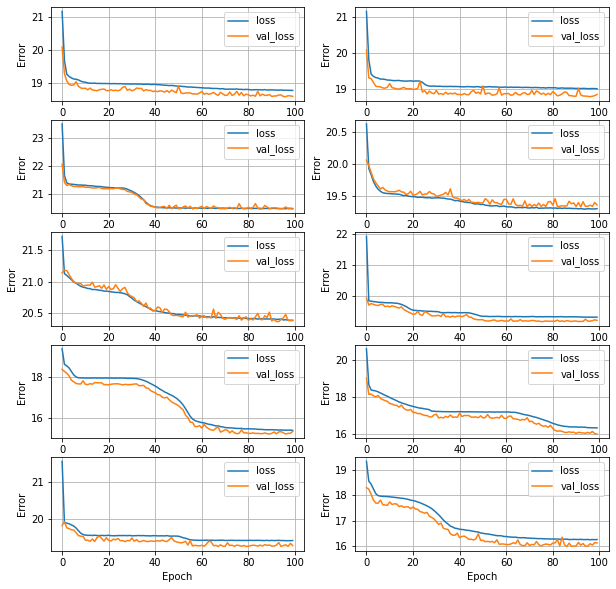

In [18]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    plot_loss(dnn_history[variable_name])

In [19]:
dnn_full_model = build_dnn_model(normalizer['ALL'])

In [20]:
%%time
history_full = dnn_full_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 53min 58s, sys: 12min 50s, total: 1h 6min 49s
Wall time: 4min 32s


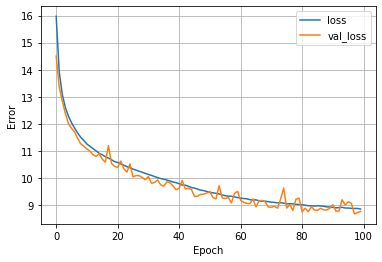

In [21]:
plot_loss(history_full)

In [22]:
test_results["dnn_full_model"] = dnn_full_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

{'dnn_full_model': 8.757624626159668}

Text(0, 0.5, 'Model Thickness(m)')

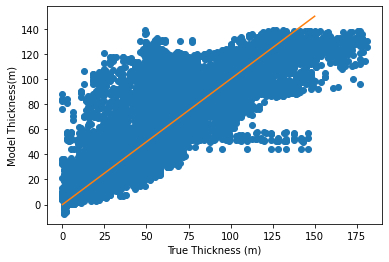

In [23]:
y = dnn_full_model.predict(test_features)
plt.plot(test_labels,y,'o')
plt.plot((0,150),(0,150),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness(m)')

<ipython-input-24-518d12a79147>:3: RuntimeWarning: divide by zero encountered in true_divide
  pct_error = (x-y)/x


ValueError: supplied range of [-inf, 8.437331199645996] is not finite

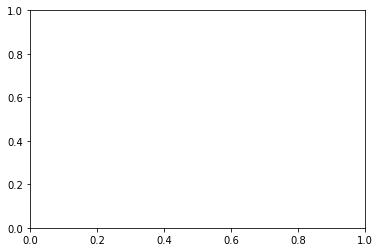

In [24]:
plt.subplots()
x = np.reshape(test_labels.values, (-1, 1)) # Training values in a n-by-1 array
pct_error = (x-y)/x
plt.hist(pct_error.flatten())
plt.xlabel('Percent Error')
plt.ylabel('Count')